<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); color: white; padding: 40px; margin: -10px -10px 20px -10px; border-radius: 0 0 15px 15px;">
<h1 style="margin: 0; font-size: 2.5em;">Electronics 101: What Makes Electronics Work?</h1>
<p style="margin: 10px 0 0 0; font-size: 1.2em; opacity: 0.9;">Week 1, Session 2 — Fab Futures</p>
<p style="margin: 5px 0 0 0; font-size: 1em; opacity: 0.7;">Jennifer Volk, Alexander Wynn, Andreas Olofsson</p>
</div>

## Contents

1. [Electrons & Wires: The Water Analogy](#1-electrons--wires-the-water-analogy)
2. [Passive Components](#2-passive-components)
3. [Active Components: Transistors](#3-active-components-transistors)
4. [Binary Logic: 1s and 0s](#4-binary-logic-1s-and-0s)
5. [Logic Gates & Truth Tables](#5-logic-gates--truth-tables)
6. [Building Gates with Transistors](#6-building-gates-with-transistors)
7. [Circuit Simulation with SPICE](#7-circuit-simulation-with-spice)
8. [Clock Distribution](#8-clock-distribution)
9. [Schmitt Trigger](#9-schmitt-trigger)
10. [Additional Resources](#10-additional-resources)

In [1]:
# Setup
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, Circle, FancyArrowPatch, Arc, Rectangle, Polygon
import numpy as np

# For circuit-like drawings
plt.rcParams['font.family'] = 'monospace'

print("Setup complete.")

Setup complete.


---
<a id="1-electrons--wires-the-water-analogy"></a>
# 1. Electrons & Wires: The Water Analogy
---

### What Are Electrons?

Every atom has **electrons** — tiny particles with negative charge that orbit the nucleus. In metals like copper, some electrons are loosely bound and can move freely between atoms.

### Conductors vs Insulators

| Material Type | Examples | Electron Behavior |
|---------------|----------|-------------------|
| **Conductors** | Copper, Gold, Aluminum | Electrons flow easily |
| **Insulators** | Rubber, Glass, Plastic | Electrons don't flow |
| **Semiconductors** | Silicon, Germanium | Flow can be controlled |

### The Water Analogy

Electronics is invisible, but **water in pipes** behaves the same way:

| Electrical | Water Equivalent | What It Means |
|------------|------------------|---------------|
| **Voltage (V)** | Water pressure | The "push" that moves electrons |
| **Current (I)** | Flow rate (gallons/min) | How many electrons flow per second |
| **Resistance (R)** | Narrow pipe | How hard it is for electrons to flow |
| **Wire** | Pipe | The path electrons travel |
| **Ground** | Drain / reservoir | Where electrons return to |

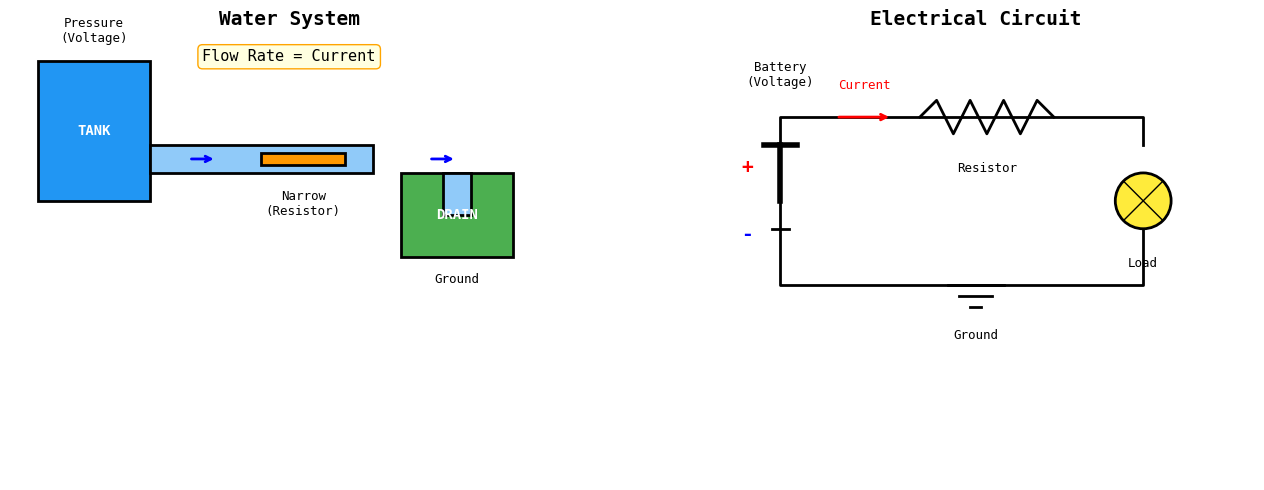

In [2]:
# Water pipe analogy visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left: Water system
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 8)
ax1.set_aspect('equal')

# Water tank (voltage source)
tank = patches.Rectangle((0.5, 5), 2, 2.5, facecolor='#2196F3', edgecolor='black', linewidth=2)
ax1.add_patch(tank)
ax1.text(1.5, 6.25, 'TANK', ha='center', va='center', fontsize=10, fontweight='bold', color='white')
ax1.text(1.5, 7.8, 'Pressure\n(Voltage)', ha='center', va='bottom', fontsize=9)

# Pipe (wire)
pipe = patches.Rectangle((2.5, 5.5), 4, 0.5, facecolor='#90CAF9', edgecolor='black', linewidth=2)
ax1.add_patch(pipe)

# Narrow section (resistor)
narrow = patches.Rectangle((4.5, 5.65), 1.5, 0.2, facecolor='#FF9800', edgecolor='black', linewidth=2)
ax1.add_patch(narrow)
ax1.text(5.25, 5.2, 'Narrow\n(Resistor)', ha='center', va='top', fontsize=9)

# Flow arrows
for x in [3.2, 7.5]:
    ax1.annotate('', xy=(x + 0.5, 5.75), xytext=(x, 5.75),
                arrowprops=dict(arrowstyle='->', color='blue', lw=2))

# Drain (ground)
drain = patches.Rectangle((7, 4), 2, 1.5, facecolor='#4CAF50', edgecolor='black', linewidth=2)
ax1.add_patch(drain)
ax1.text(8, 4.75, 'DRAIN', ha='center', va='center', fontsize=10, fontweight='bold', color='white')
ax1.text(8, 3.7, 'Ground', ha='center', va='top', fontsize=9)

# Down pipe
down_pipe = patches.Rectangle((7.75, 4.75), 0.5, 0.75, facecolor='#90CAF9', edgecolor='black', linewidth=2)
ax1.add_patch(down_pipe)

ax1.text(5, 7.5, 'Flow Rate = Current', ha='center', fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='orange'))

ax1.set_title('Water System', fontsize=14, fontweight='bold')
ax1.axis('off')

# Right: Electrical equivalent
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 8)
ax2.set_aspect('equal')

# Battery (voltage source)
ax2.plot([1.5, 1.5], [5, 6], 'k-', linewidth=4)  # Long line (positive)
ax2.plot([1.5, 1.5], [4.5, 5], 'k-', linewidth=2)  # Short line (negative)
ax2.plot([1.2, 1.8], [6, 6], 'k-', linewidth=4)
ax2.plot([1.35, 1.65], [4.5, 4.5], 'k-', linewidth=2)
ax2.text(1.5, 7, 'Battery\n(Voltage)', ha='center', va='bottom', fontsize=9)
ax2.text(0.8, 5.5, '+', fontsize=14, fontweight='bold', color='red')
ax2.text(0.8, 4.3, '-', fontsize=14, fontweight='bold', color='blue')

# Wire from positive
ax2.plot([1.5, 1.5, 8, 8], [6, 6.5, 6.5, 6], 'k-', linewidth=2)

# Resistor symbol
zigzag_x = np.array([4, 4.3, 4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4])
zigzag_y = np.array([6.5, 6.8, 6.2, 6.8, 6.2, 6.8, 6.2, 6.8, 6.5])
ax2.plot(zigzag_x, zigzag_y, 'k-', linewidth=2)
ax2.text(5.2, 5.7, 'Resistor', ha='center', va='top', fontsize=9)

# Light bulb (load)
bulb = Circle((8, 5), 0.5, facecolor='#FFEB3B', edgecolor='black', linewidth=2)
ax2.add_patch(bulb)
ax2.plot([7.65, 8.35], [4.65, 5.35], 'k-', linewidth=1)
ax2.plot([7.65, 8.35], [5.35, 4.65], 'k-', linewidth=1)
ax2.text(8, 4, 'Load', ha='center', va='top', fontsize=9)

# Wire to ground
ax2.plot([8, 8, 1.5, 1.5], [4.5, 3.5, 3.5, 4.5], 'k-', linewidth=2)

# Ground symbol
ax2.plot([4.5, 5.5], [3.5, 3.5], 'k-', linewidth=2)
ax2.plot([4.7, 5.3], [3.3, 3.3], 'k-', linewidth=2)
ax2.plot([4.9, 5.1], [3.1, 3.1], 'k-', linewidth=2)
ax2.text(5, 2.7, 'Ground', ha='center', va='top', fontsize=9)

# Current arrow
ax2.annotate('', xy=(3.5, 6.5), xytext=(2.5, 6.5),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))
ax2.text(3, 7, 'Current', ha='center', fontsize=9, color='red')

ax2.set_title('Electrical Circuit', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

### Ohm's Law: V = I × R

The most important equation in electronics:

| Symbol | Meaning | Unit | Water Analogy |
|--------|---------|------|---------------|
| **V** | Voltage | Volts (V) | Pressure |
| **I** | Current | Amps (A) | Flow rate |
| **R** | Resistance | Ohms (Ω) | Pipe narrowness |

**Key insight**: Higher voltage (pressure) pushes more current (flow) through the same resistance (pipe).

---
<a id="2-passive-components"></a>
# 2. Passive Components
---

**Passive components** don't amplify signals — they just modify how current flows.

### The Three Basic Passive Components

| Component | Symbol | What It Does | Water Analogy |
|-----------|--------|--------------|---------------|
| **Resistor** | R | Slows down all electrons | Narrow pipe |
| **Capacitor** | C | Blocks slow signals, passes fast ones | Flexible membrane |
| **Inductor** | L | Blocks fast signals, passes slow ones | Heavy paddle wheel |

### Think About It

- **Resistor**: Like a kink in a hose — constant resistance regardless of flow speed
- **Capacitor**: Like a rubber membrane across a pipe — quick pressure changes push through, but steady pressure just stretches the membrane
- **Inductor**: Like a heavy paddle wheel — resists changes in flow, but once spinning, keeps going

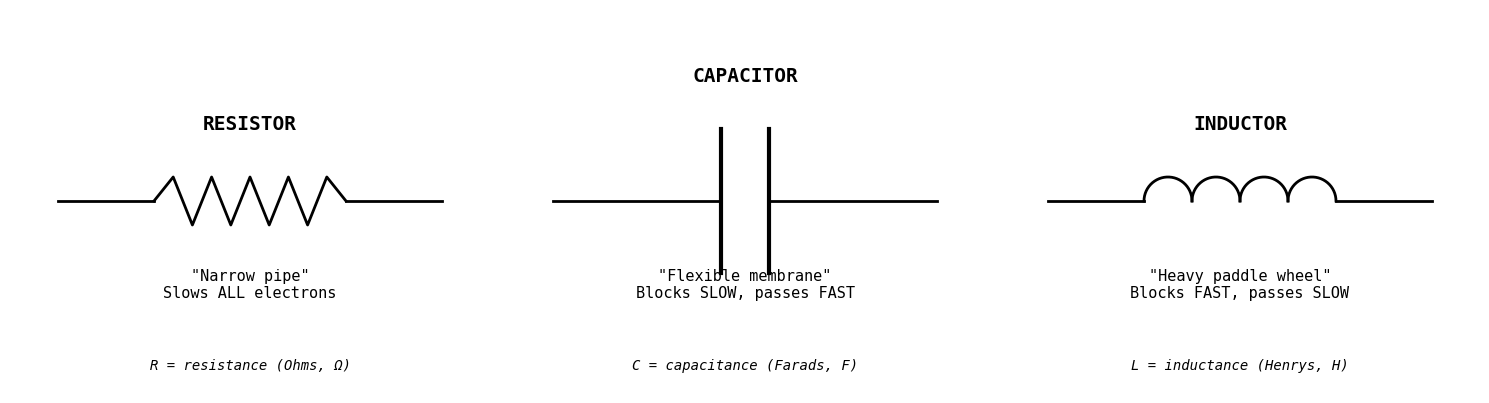

In [3]:
# Passive components visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Resistor
ax = axes[0]
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)

# Wire and resistor symbol
ax.plot([1, 3], [4, 4], 'k-', linewidth=2)
zigzag_x = np.array([3, 3.4, 3.8, 4.2, 4.6, 5.0, 5.4, 5.8, 6.2, 6.6, 7])
zigzag_y = np.array([4, 4.5, 3.5, 4.5, 3.5, 4.5, 3.5, 4.5, 3.5, 4.5, 4])
ax.plot(zigzag_x, zigzag_y, 'k-', linewidth=2)
ax.plot([7, 9], [4, 4], 'k-', linewidth=2)

# Labels
ax.text(5, 5.5, 'RESISTOR', ha='center', fontsize=14, fontweight='bold')
ax.text(5, 2, '"Narrow pipe"\nSlows ALL electrons', ha='center', fontsize=11)
ax.text(5, 0.5, 'R = resistance (Ohms, Ω)', ha='center', fontsize=10, style='italic')

ax.set_aspect('equal')
ax.axis('off')

# Capacitor
ax = axes[1]
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)

# Wire and capacitor symbol
ax.plot([1, 4.5], [4, 4], 'k-', linewidth=2)
ax.plot([4.5, 4.5], [2.5, 5.5], 'k-', linewidth=3)
ax.plot([5.5, 5.5], [2.5, 5.5], 'k-', linewidth=3)
ax.plot([5.5, 9], [4, 4], 'k-', linewidth=2)

# Labels
ax.text(5, 6.5, 'CAPACITOR', ha='center', fontsize=14, fontweight='bold')
ax.text(5, 2, '"Flexible membrane"\nBlocks SLOW, passes FAST', ha='center', fontsize=11)
ax.text(5, 0.5, 'C = capacitance (Farads, F)', ha='center', fontsize=10, style='italic')

ax.set_aspect('equal')
ax.axis('off')

# Inductor
ax = axes[2]
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)

# Wire and inductor symbol (coil)
ax.plot([1, 3], [4, 4], 'k-', linewidth=2)
theta = np.linspace(0, 4 * np.pi, 100)
coil_x = 3 + theta / (np.pi) + 0.3 * np.sin(theta)
coil_y = 4 + 0.5 * np.sin(theta)
# Simplified coil with humps
for i in range(4):
    arc_theta = np.linspace(0, np.pi, 30)
    arc_x = 3.5 + i * 1 + 0.5 * np.cos(arc_theta)
    arc_y = 4 + 0.5 * np.sin(arc_theta)
    ax.plot(arc_x, arc_y, 'k-', linewidth=2)
ax.plot([7, 9], [4, 4], 'k-', linewidth=2)

# Labels
ax.text(5, 5.5, 'INDUCTOR', ha='center', fontsize=14, fontweight='bold')
ax.text(5, 2, '"Heavy paddle wheel"\nBlocks FAST, passes SLOW', ha='center', fontsize=11)
ax.text(5, 0.5, 'L = inductance (Henrys, H)', ha='center', fontsize=10, style='italic')

ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()

### Passive Components in Wires

Every wire naturally has some resistance, capacitance, and inductance — even if you don't add components!

| Wire Property | Physical Cause | Effect on Signals |
|---------------|----------------|-------------------|
| **Resistance** | Metal isn't perfect conductor | Voltage drop, heat |
| **Capacitance** | Wires next to each other form parallel plates | Slows signal edges |
| **Inductance** | Current creates magnetic field | Limits switching speed |

### Why This Matters for Processors

| Issue | Cause | Effect on Chip |
|-------|-------|----------------|
| RC delay | Wire R × C | Limits clock speed |
| Signal integrity | L and C interact | Can cause ringing/overshoot |
| Power loss | I²R heating | Wastes energy, generates heat |

Modern chips use multiple metal layers with different thicknesses to manage these effects.

---
<a id="3-active-components-transistors"></a>
# 3. Active Components: Transistors
---

### A Brief History

The transistor was invented in **1947** at Bell Labs by:
- **John Bardeen**
- **William Shockley**  
- **Walter Brattain**

They received the Nobel Prize in Physics in 1956. The transistor replaced vacuum tubes and made modern electronics possible.

### What's in a Name?

**Transistor** = **Trans**fer + Re**sistor**

A transistor is a variable resistor controlled by voltage. It can act as:
- A **switch** (digital circuits) — ON or OFF
- An **amplifier** (analog circuits) — small signal in, large signal out

### The Two Types: NMOS and PMOS

Modern chips use **CMOS** technology (Complementary MOS), which combines two types of transistors:

| Type | Turns ON when... | Connects to... | Think of it as... |
|------|------------------|----------------|-------------------|
| **NMOS** | Gate = HIGH (1) | Ground (GND) | Normally open faucet |
| **PMOS** | Gate = LOW (0) | Power (VDD) | Normally closed faucet |

### The Water Valve Analogy

Think of transistors as **water valves**:

- **NMOS**: Gate signal OPENS the valve (lets water flow)
- **PMOS**: Gate signal CLOSES the valve (stops water flow)

They're complementary — when one is ON, the other is OFF!

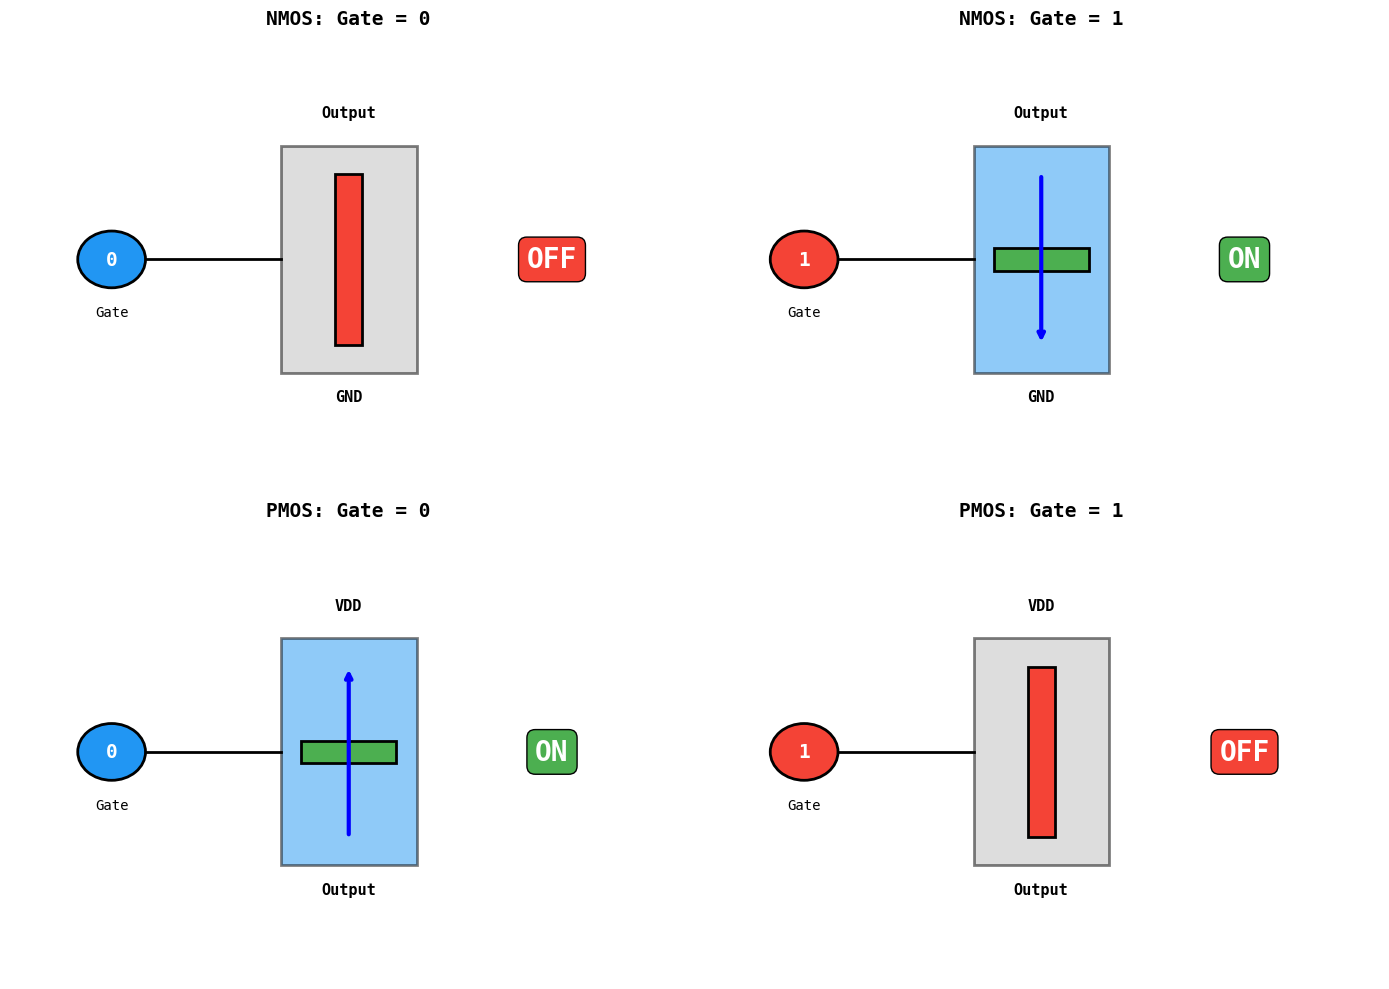

Key insight: NMOS and PMOS are complementary!
- NMOS: Gate HIGH → ON (connects to GND)
- PMOS: Gate LOW → ON (connects to VDD)


In [4]:
# NMOS and PMOS switch diagrams
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

def draw_transistor_switch(ax, is_nmos, gate_high, title):
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 8)
    
    # Determine if ON or OFF
    if is_nmos:
        is_on = gate_high
        top_label = 'Output'
        bot_label = 'GND'
    else:
        is_on = not gate_high
        top_label = 'VDD'
        bot_label = 'Output'
    
    # Draw pipe/channel
    pipe_color = '#2196F3' if is_on else '#BDBDBD'
    ax.add_patch(patches.Rectangle((4, 2), 2, 4, 
                 facecolor=pipe_color, edgecolor='black', linewidth=2, alpha=0.5))
    
    # Draw valve (gate)
    valve_y = 4 if is_on else 4  # Same position
    if is_on:
        # Open valve - horizontal line
        ax.add_patch(patches.Rectangle((4.3, 3.8), 1.4, 0.4, 
                     facecolor='#4CAF50', edgecolor='black', linewidth=2))
    else:
        # Closed valve - vertical line blocking flow
        ax.add_patch(patches.Rectangle((4.8, 2.5), 0.4, 3, 
                     facecolor='#f44336', edgecolor='black', linewidth=2))
    
    # Gate control
    ax.plot([2, 4], [4, 4], 'k-', linewidth=2)
    gate_color = '#f44336' if gate_high else '#2196F3'
    ax.add_patch(Circle((1.5, 4), 0.5, facecolor=gate_color, edgecolor='black', linewidth=2))
    ax.text(1.5, 4, '1' if gate_high else '0', ha='center', va='center', 
            fontsize=14, fontweight='bold', color='white')
    ax.text(1.5, 3, 'Gate', ha='center', fontsize=10)
    
    # Labels
    ax.text(5, 6.5, top_label, ha='center', fontsize=11, fontweight='bold')
    ax.text(5, 1.5, bot_label, ha='center', fontsize=11, fontweight='bold')
    
    # Status
    status = 'ON' if is_on else 'OFF'
    status_color = '#4CAF50' if is_on else '#f44336'
    ax.text(8, 4, status, ha='center', va='center', fontsize=20, fontweight='bold',
            color='white', bbox=dict(boxstyle='round', facecolor=status_color, edgecolor='black'))
    
    # Flow arrows if ON
    if is_on:
        if is_nmos:
            ax.annotate('', xy=(5, 2.5), xytext=(5, 5.5),
                       arrowprops=dict(arrowstyle='->', color='blue', lw=3))
        else:
            ax.annotate('', xy=(5, 5.5), xytext=(5, 2.5),
                       arrowprops=dict(arrowstyle='->', color='blue', lw=3))
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('off')

# NMOS examples
draw_transistor_switch(axes[0, 0], is_nmos=True, gate_high=False, title='NMOS: Gate = 0')
draw_transistor_switch(axes[0, 1], is_nmos=True, gate_high=True, title='NMOS: Gate = 1')

# PMOS examples
draw_transistor_switch(axes[1, 0], is_nmos=False, gate_high=False, title='PMOS: Gate = 0')
draw_transistor_switch(axes[1, 1], is_nmos=False, gate_high=True, title='PMOS: Gate = 1')

plt.tight_layout()
plt.show()

print("Key insight: NMOS and PMOS are complementary!")
print("- NMOS: Gate HIGH → ON (connects to GND)")
print("- PMOS: Gate LOW → ON (connects to VDD)")

### Transistor Schematic Symbols

```
      NMOS                    PMOS
        
      Drain                  Source
        │                      │
        │                      │
   ─────┤                 ─────┤
  Gate  │                 Gate ○│   ← Circle means "inverted"
   ─────┤                 ─────┤
        │                      │
        │                      │
      Source                 Drain
```

The small circle (○) on PMOS indicates it's the "opposite" — it turns ON when gate is LOW.

---
<a id="4-binary-logic-1s-and-0s"></a>
# 4. Binary Logic: 1s and 0s
---

### Voltage Levels Represent Logic

In digital circuits, we use voltage to represent 1s and 0s:

| Logic Level | Voltage (typical) | Meaning |
|-------------|-------------------|----------|
| **HIGH (1)** | Near VDD (power) | True, ON |
| **LOW (0)** | Near GND (ground) | False, OFF |

### Common Voltage Standards

| Standard | HIGH | LOW | Where Used |
|----------|------|-----|------------|
| 5V TTL | ~5V | ~0V | Arduino, older chips |
| 3.3V CMOS | ~3.3V | ~0V | Raspberry Pi, modern MCUs |
| 1.8V CMOS | ~1.8V | ~0V | Modern processors |

### Connection to Morse Code

Digital logic is like **Morse code** — just ON and OFF signals!

- Morse: Short (dot) and Long (dash) pulses
- Digital: HIGH and LOW voltage levels

Both represent information with just two states. Samuel Morse's telegraph (1837) was one of the first digital communication systems!

---
<a id="5-logic-gates--truth-tables"></a>
# 5. Logic Gates & Truth Tables
---

Logic gates are circuits that perform basic logical operations. Every computer is built from these!

### AND Gate

Output is 1 **only if BOTH** inputs are 1.

| A | B | A AND B |
|---|---|--------|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | **1** |

*Think: "Both must agree"*

### OR Gate

Output is 1 **if EITHER** input is 1.

| A | B | A OR B |
|---|---|-------|
| 0 | 0 | 0 |
| 0 | 1 | **1** |
| 1 | 0 | **1** |
| 1 | 1 | **1** |

*Think: "Anyone says yes"*

### NOT Gate (Inverter)

Output is the **opposite** of input.

| A | NOT A |
|---|-------|
| 0 | **1** |
| 1 | **0** |

*Think: "Flip it"*

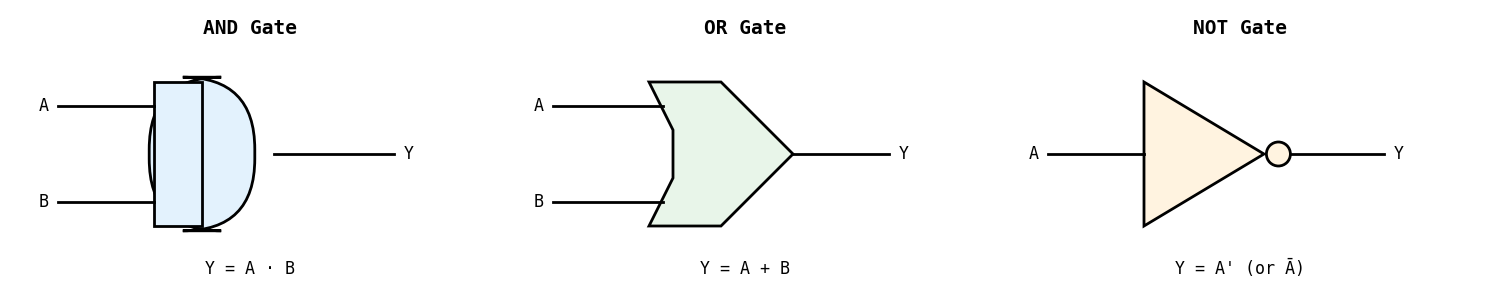

In [5]:
# Logic gate symbols
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# AND gate
ax = axes[0]
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

# AND gate shape (D shape)
and_body = patches.FancyBboxPatch((3, 1.5), 2, 3, boxstyle="round,pad=0.1,rounding_size=1.5",
                                   facecolor='#E3F2FD', edgecolor='black', linewidth=2)
ax.add_patch(and_body)
ax.add_patch(patches.Rectangle((3, 1.5), 1, 3, facecolor='#E3F2FD', edgecolor='black', linewidth=2))

# Input lines
ax.plot([1, 3], [4, 4], 'k-', linewidth=2)
ax.plot([1, 3], [2, 2], 'k-', linewidth=2)
ax.text(0.8, 4, 'A', ha='right', va='center', fontsize=12)
ax.text(0.8, 2, 'B', ha='right', va='center', fontsize=12)

# Output line
ax.plot([5.5, 8], [3, 3], 'k-', linewidth=2)
ax.text(8.2, 3, 'Y', ha='left', va='center', fontsize=12)

ax.text(5, 5.5, 'AND Gate', ha='center', fontsize=14, fontweight='bold')
ax.text(5, 0.5, 'Y = A · B', ha='center', fontsize=12)
ax.axis('off')
ax.set_aspect('equal')

# OR gate
ax = axes[1]
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

# OR gate shape (curved back, pointed front)
or_verts = [(3, 1.5), (3.5, 2.5), (3.5, 3.5), (3, 4.5), (4.5, 4.5), (6, 3), (4.5, 1.5), (3, 1.5)]
or_body = patches.Polygon(or_verts, facecolor='#E8F5E9', edgecolor='black', linewidth=2)
ax.add_patch(or_body)

# Input lines
ax.plot([1, 3.3], [4, 4], 'k-', linewidth=2)
ax.plot([1, 3.3], [2, 2], 'k-', linewidth=2)
ax.text(0.8, 4, 'A', ha='right', va='center', fontsize=12)
ax.text(0.8, 2, 'B', ha='right', va='center', fontsize=12)

# Output line
ax.plot([6, 8], [3, 3], 'k-', linewidth=2)
ax.text(8.2, 3, 'Y', ha='left', va='center', fontsize=12)

ax.text(5, 5.5, 'OR Gate', ha='center', fontsize=14, fontweight='bold')
ax.text(5, 0.5, 'Y = A + B', ha='center', fontsize=12)
ax.axis('off')
ax.set_aspect('equal')

# NOT gate (inverter)
ax = axes[2]
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

# NOT gate shape (triangle + circle)
not_verts = [(3, 1.5), (3, 4.5), (5.5, 3)]
not_body = patches.Polygon(not_verts, facecolor='#FFF3E0', edgecolor='black', linewidth=2)
ax.add_patch(not_body)
ax.add_patch(Circle((5.8, 3), 0.25, facecolor='#FFF3E0', edgecolor='black', linewidth=2))

# Input line
ax.plot([1, 3], [3, 3], 'k-', linewidth=2)
ax.text(0.8, 3, 'A', ha='right', va='center', fontsize=12)

# Output line
ax.plot([6.05, 8], [3, 3], 'k-', linewidth=2)
ax.text(8.2, 3, 'Y', ha='left', va='center', fontsize=12)

ax.text(5, 5.5, 'NOT Gate', ha='center', fontsize=14, fontweight='bold')
ax.text(5, 0.5, "Y = A' (or Ā)", ha='center', fontsize=12)
ax.axis('off')
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

---
<a id="6-building-gates-with-transistors"></a>
# 6. Building Gates with Transistors
---

### CMOS Gate Structure

Every CMOS logic gate has two parts:

| Network | Transistor Type | Connects Output To | Active When |
|---------|-----------------|-------------------|-------------|
| **Pull-up** | PMOS | VDD (power) | Output should be HIGH |
| **Pull-down** | NMOS | GND (ground) | Output should be LOW |

### The Key Rule

- **PMOS in parallel** = OR function for pull-up
- **PMOS in series** = AND function for pull-up
- **NMOS in parallel** = OR function for pull-down  
- **NMOS in series** = AND function for pull-down

### Building an AND Gate

An AND gate is actually a **NAND gate + NOT gate (inverter)**.

**NAND gate** (NOT-AND):
- Pull-up: PMOS in **parallel** (either input LOW → output HIGH)
- Pull-down: NMOS in **series** (both inputs HIGH → output LOW)

Then we add an inverter to flip the output → AND gate!

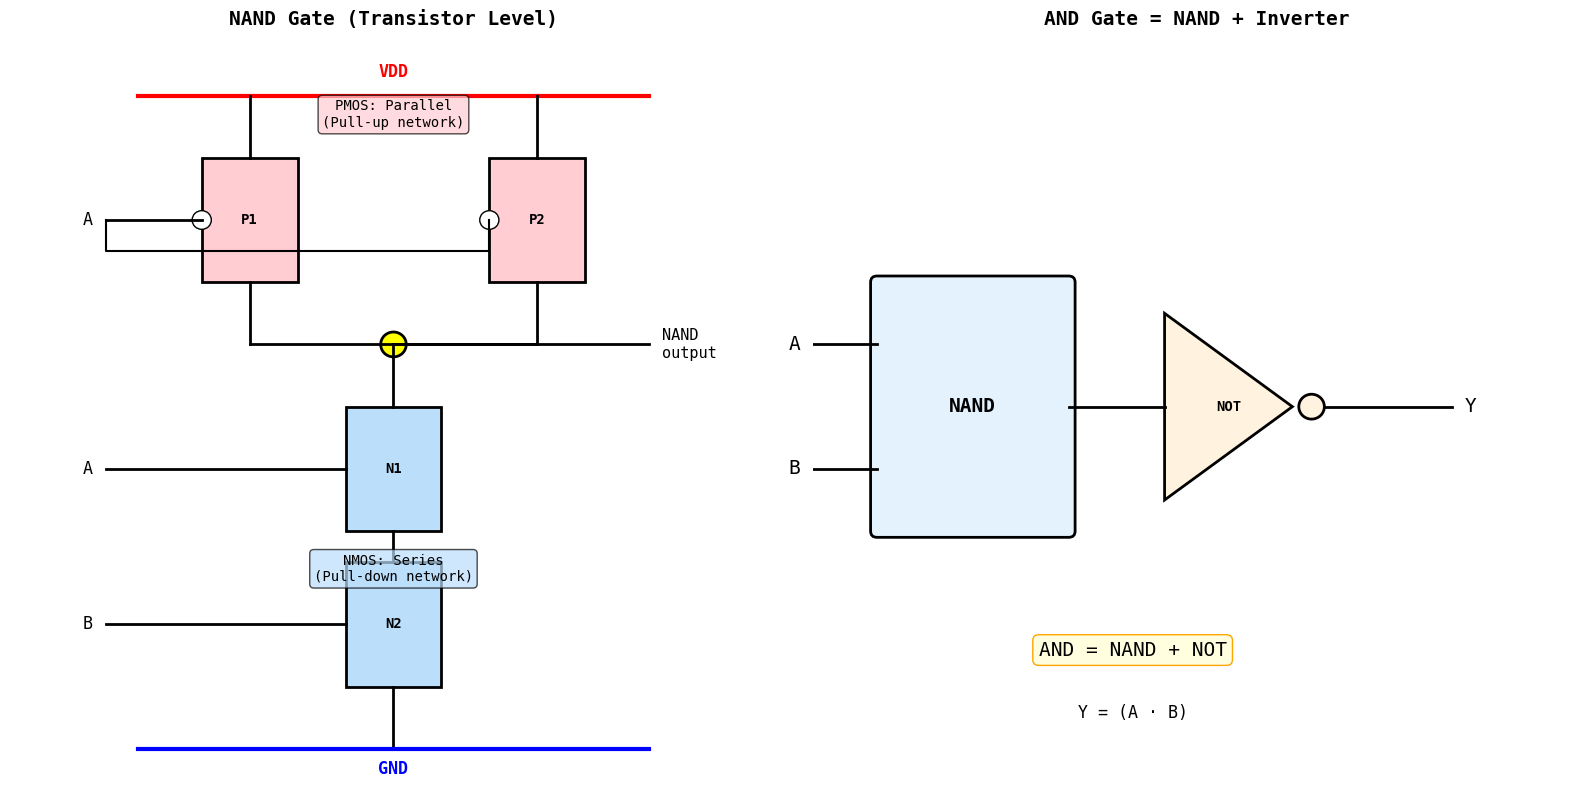

In [6]:
# AND gate from transistors - step by step
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Left: NAND gate structure
ax = axes[0]
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

# VDD rail
ax.plot([2, 10], [11, 11], 'r-', linewidth=3)
ax.text(6, 11.3, 'VDD', ha='center', fontsize=12, fontweight='bold', color='red')

# PMOS transistors in parallel (pull-up)
# PMOS 1
ax.add_patch(patches.Rectangle((3, 8), 1.5, 2, facecolor='#FFCDD2', edgecolor='black', linewidth=2))
ax.text(3.75, 9, 'P1', ha='center', va='center', fontsize=10, fontweight='bold')
ax.plot([3.75, 3.75], [10, 11], 'k-', linewidth=2)  # To VDD
ax.plot([3.75, 3.75], [8, 7], 'k-', linewidth=2)    # To output
ax.plot([1.5, 3], [9, 9], 'k-', linewidth=2)        # Gate
ax.add_patch(Circle((3, 9), 0.15, facecolor='white', edgecolor='black'))  # Inversion bubble
ax.text(1.3, 9, 'A', ha='right', va='center', fontsize=12)

# PMOS 2  
ax.add_patch(patches.Rectangle((7.5, 8), 1.5, 2, facecolor='#FFCDD2', edgecolor='black', linewidth=2))
ax.text(8.25, 9, 'P2', ha='center', va='center', fontsize=10, fontweight='bold')
ax.plot([8.25, 8.25], [10, 11], 'k-', linewidth=2)  # To VDD
ax.plot([8.25, 8.25], [8, 7], 'k-', linewidth=2)    # To output
ax.plot([1.5, 1.5, 7.5], [9, 8.5, 8.5], 'k-', linewidth=1.5)  # Gate connection
ax.plot([7.5, 7.5], [8.5, 9], 'k-', linewidth=1.5)
ax.plot([1.5, 7.35], [9, 9], 'k-', linewidth=2, alpha=0)  # Gate
ax.add_patch(Circle((7.5, 9), 0.15, facecolor='white', edgecolor='black'))  # Inversion bubble

# Connect PMOS outputs (parallel)
ax.plot([3.75, 8.25], [7, 7], 'k-', linewidth=2)

# NMOS transistors in series (pull-down)
# NMOS 1 (top)
ax.add_patch(patches.Rectangle((5.25, 4), 1.5, 2, facecolor='#BBDEFB', edgecolor='black', linewidth=2))
ax.text(6, 5, 'N1', ha='center', va='center', fontsize=10, fontweight='bold')
ax.plot([6, 6], [6, 7], 'k-', linewidth=2)   # To output node
ax.plot([1.5, 5.25], [5, 5], 'k-', linewidth=2)  # Gate A
ax.text(1.3, 5, 'A', ha='right', va='center', fontsize=12)

# NMOS 2 (bottom)
ax.add_patch(patches.Rectangle((5.25, 1.5), 1.5, 2, facecolor='#BBDEFB', edgecolor='black', linewidth=2))
ax.text(6, 2.5, 'N2', ha='center', va='center', fontsize=10, fontweight='bold')
ax.plot([6, 6], [3.5, 4], 'k-', linewidth=2)  # Connect to N1
ax.plot([6, 6], [1.5, 0.5], 'k-', linewidth=2)  # To GND
ax.plot([1.5, 5.25], [2.5, 2.5], 'k-', linewidth=2)  # Gate B
ax.text(1.3, 2.5, 'B', ha='right', va='center', fontsize=12)

# GND rail
ax.plot([2, 10], [0.5, 0.5], 'b-', linewidth=3)
ax.text(6, 0.1, 'GND', ha='center', fontsize=12, fontweight='bold', color='blue')

# Output node
ax.plot([6, 10], [7, 7], 'k-', linewidth=2)
ax.add_patch(Circle((6, 7), 0.2, facecolor='yellow', edgecolor='black', linewidth=2))
ax.text(10.2, 7, 'NAND\noutput', ha='left', va='center', fontsize=11)

# Labels
ax.text(6, 10.5, 'PMOS: Parallel\n(Pull-up network)', ha='center', fontsize=10, 
        bbox=dict(boxstyle='round', facecolor='#FFCDD2', alpha=0.7))
ax.text(6, 3.2, 'NMOS: Series\n(Pull-down network)', ha='center', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='#BBDEFB', alpha=0.7))

ax.set_title('NAND Gate (Transistor Level)', fontsize=14, fontweight='bold')
ax.axis('off')

# Right: Complete AND gate (NAND + inverter)
ax = axes[1]
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)

# NAND gate block
nand = patches.FancyBboxPatch((1, 4), 3, 4, boxstyle="round,pad=0.1",
                               facecolor='#E3F2FD', edgecolor='black', linewidth=2)
ax.add_patch(nand)
ax.text(2.5, 6, 'NAND', ha='center', va='center', fontsize=14, fontweight='bold')

# Inputs
ax.plot([0, 1], [7, 7], 'k-', linewidth=2)
ax.plot([0, 1], [5, 5], 'k-', linewidth=2)
ax.text(-0.2, 7, 'A', ha='right', va='center', fontsize=14)
ax.text(-0.2, 5, 'B', ha='right', va='center', fontsize=14)

# NOT gate (inverter)
not_verts = [(5.5, 4.5), (5.5, 7.5), (7.5, 6)]
not_body = patches.Polygon(not_verts, facecolor='#FFF3E0', edgecolor='black', linewidth=2)
ax.add_patch(not_body)
ax.add_patch(Circle((7.8, 6), 0.2, facecolor='#FFF3E0', edgecolor='black', linewidth=2))
ax.text(6.5, 6, 'NOT', ha='center', va='center', fontsize=10, fontweight='bold')

# Connections
ax.plot([4, 5.5], [6, 6], 'k-', linewidth=2)
ax.plot([8, 10], [6, 6], 'k-', linewidth=2)
ax.text(10.2, 6, 'Y', ha='left', va='center', fontsize=14)

# Equation
ax.text(5, 2, 'AND = NAND + NOT', ha='center', fontsize=14, 
        bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='orange'))
ax.text(5, 1, 'Y = (A · B)', ha='center', fontsize=12)

ax.set_title('AND Gate = NAND + Inverter', fontsize=14, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

### Walking Through Each Input Combination

Let's trace what happens in the NAND gate for each input:

| A | B | PMOS P1 | PMOS P2 | NMOS N1 | NMOS N2 | Output Path | NAND Out |
|---|---|---------|---------|---------|---------|-------------|----------|
| 0 | 0 | ON | ON | OFF | OFF | → VDD (pull-up) | **1** |
| 0 | 1 | ON | OFF | OFF | ON | → VDD (P1 on) | **1** |
| 1 | 0 | OFF | ON | ON | OFF | → VDD (P2 on) | **1** |
| 1 | 1 | OFF | OFF | ON | ON | → GND (pull-down) | **0** |

The inverter flips this, giving us the AND truth table!

---
<a id="7-circuit-simulation-with-spice"></a>
# 7. Circuit Simulation with SPICE
---

### What is SPICE?

**SPICE** (Simulation Program with Integrated Circuit Emphasis) is software that simulates electronic circuits. You describe your circuit in a text file called a **netlist**, and SPICE calculates voltages and currents.

### What is a Netlist?

A netlist is a text description of your circuit — what components you have and how they're connected. Each line describes one component.

### Basic Device Syntax

| Component | Syntax | Example |
|-----------|--------|--------|
| Resistor | `Rx n1 n2 R=value` | `R1 in out R=1k` |
| Capacitor | `Cx n1 n2 C=value` | `C1 out gnd C=1p` |
| Inductor | `Lx n1 n2 L=value` | `L1 in out L=1n` |
| MOSFET | `Mx drain gate source bulk model L=len W=wid` | `M1 out in vdd vdd pmos L=1u W=2u` |

Where:
- `n1`, `n2` are node names (connection points)
- `k` = kilo (1000), `p` = pico (10⁻¹²), `n` = nano (10⁻⁹), `u` = micro (10⁻⁶)

### Transistor Models

SPICE needs to know how transistors behave. We define models:

```spice
.model nmos nmos (vth0=0.4)
.model pmos pmos (vth0=-0.4)
```

Real PDKs (like Sky130) provide detailed models with hundreds of parameters.

### Voltage Sources and Signals

**DC voltage source:**
```spice
Vdd vdd gnd 1.8
```

**PWL (Piecewise Linear) — create test signals:**
```spice
Va a gnd PWL(0n 0 10n 0 11n 1.8 30n 1.8 31n 0 50n 0)
```

This creates a signal that:
- 0-10ns: stays at 0V
- 10-11ns: rises to 1.8V
- 11-30ns: stays at 1.8V
- 30-31ns: falls to 0V

### Complete AND Gate Netlist Example

```spice
* AND Gate using CMOS

* Power supply
Vdd vdd gnd 1.8

* Input signals (PWL)
Va a gnd PWL(0n 0 10n 0 11n 1.8 50n 1.8 51n 0 100n 0)
Vb b gnd PWL(0n 0 25n 0 26n 1.8 75n 1.8 76n 0 100n 0)

* NAND gate
* PMOS pull-up (parallel)
Mp1 nand_out a vdd vdd pmos L=1u W=2u
Mp2 nand_out b vdd vdd pmos L=1u W=2u

* NMOS pull-down (series)
Mn1 nand_out a mid gnd nmos L=1u W=1u
Mn2 mid b gnd gnd nmos L=1u W=1u

* Inverter (to make AND from NAND)
Mp3 out nand_out vdd vdd pmos L=1u W=2u
Mn3 out nand_out gnd gnd nmos L=1u W=1u

* Transistor models
.model nmos nmos (vth0=0.4)
.model pmos pmos (vth0=-0.4)

* Simulation control
.control
tran 0.1n 100n
plot v(a) v(b) v(out)
.endc

.end
```

### Understanding the Simulation Commands

| Command | Meaning |
|---------|--------|
| `.control` | Start of simulation commands |
| `tran 0.1n 100n` | Transient analysis: 0.1ns steps, run for 100ns |
| `plot v(a) v(b) v(out)` | Plot voltages at nodes a, b, and out |
| `.endc` | End of control section |
| `.end` | End of netlist |

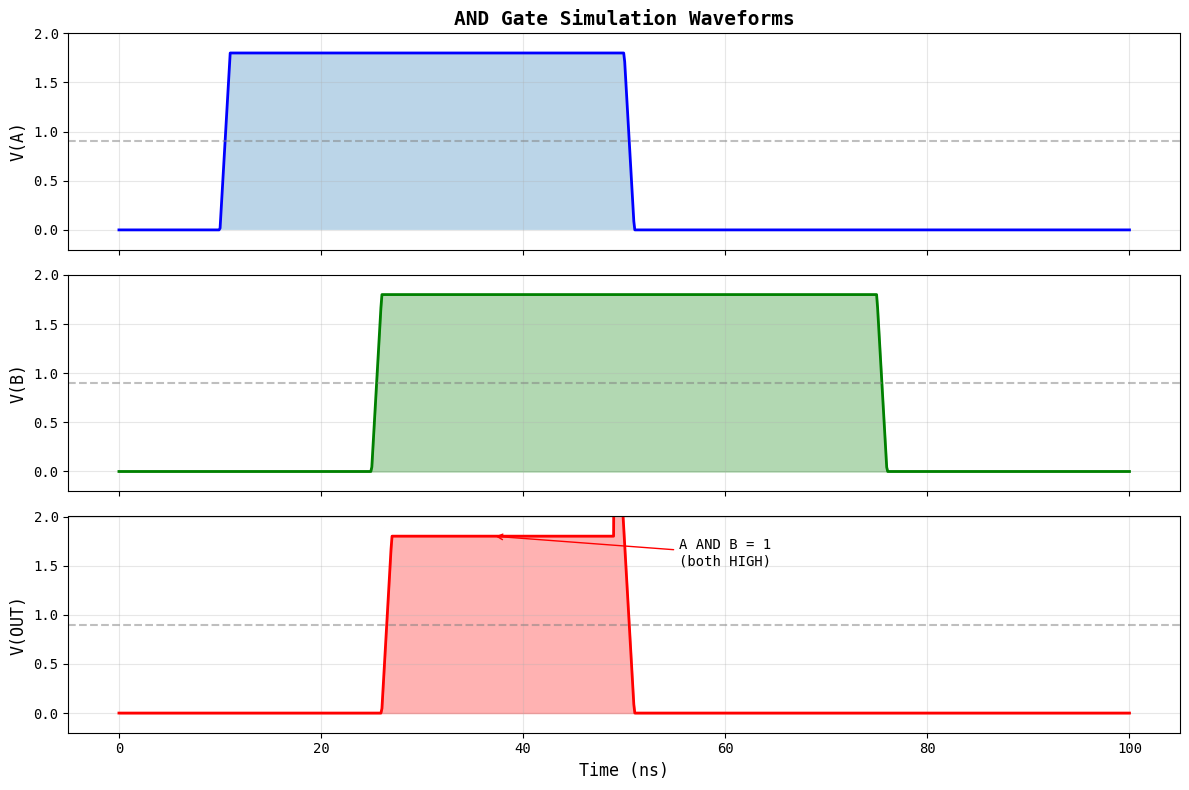

The output is HIGH (1.8V) only during 25-50ns when BOTH inputs are HIGH.


In [7]:
# Simulated AND gate waveforms (what you'd see in SPICE)
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Time axis (in nanoseconds)
t = np.linspace(0, 100, 1000)

# Signal A: LOW 0-10ns, HIGH 10-50ns, LOW 50-100ns
a = np.zeros_like(t)
a[(t >= 10) & (t <= 50)] = 1.8
# Add transitions
for i, ti in enumerate(t):
    if 10 <= ti <= 11:
        a[i] = 1.8 * (ti - 10) / 1
    elif 50 <= ti <= 51:
        a[i] = 1.8 * (1 - (ti - 50) / 1)

# Signal B: LOW 0-25ns, HIGH 25-75ns, LOW 75-100ns  
b = np.zeros_like(t)
b[(t >= 25) & (t <= 75)] = 1.8
for i, ti in enumerate(t):
    if 25 <= ti <= 26:
        b[i] = 1.8 * (ti - 25) / 1
    elif 75 <= ti <= 76:
        b[i] = 1.8 * (1 - (ti - 75) / 1)

# Output: HIGH only when BOTH A and B are HIGH (25-50ns)
out = np.zeros_like(t)
out[(t >= 26) & (t <= 50)] = 1.8
for i, ti in enumerate(t):
    if 25 <= ti <= 27:
        out[i] = 1.8 * max(0, (ti - 26) / 1)
    elif 49 <= ti <= 51:
        out[i] = 1.8 * max(0, 1 - (ti - 50) / 1)

# Plot A
axes[0].plot(t, a, 'b-', linewidth=2)
axes[0].set_ylabel('V(A)', fontsize=12)
axes[0].set_ylim(-0.2, 2.0)
axes[0].axhline(y=0.9, color='gray', linestyle='--', alpha=0.5)
axes[0].fill_between(t, 0, a, alpha=0.3)
axes[0].grid(True, alpha=0.3)
axes[0].set_title('AND Gate Simulation Waveforms', fontsize=14, fontweight='bold')

# Plot B
axes[1].plot(t, b, 'g-', linewidth=2)
axes[1].set_ylabel('V(B)', fontsize=12)
axes[1].set_ylim(-0.2, 2.0)
axes[1].axhline(y=0.9, color='gray', linestyle='--', alpha=0.5)
axes[1].fill_between(t, 0, b, alpha=0.3, color='green')
axes[1].grid(True, alpha=0.3)

# Plot Output
axes[2].plot(t, out, 'r-', linewidth=2)
axes[2].set_ylabel('V(OUT)', fontsize=12)
axes[2].set_xlabel('Time (ns)', fontsize=12)
axes[2].set_ylim(-0.2, 2.0)
axes[2].axhline(y=0.9, color='gray', linestyle='--', alpha=0.5)
axes[2].fill_between(t, 0, out, alpha=0.3, color='red')
axes[2].grid(True, alpha=0.3)

# Add annotation
axes[2].annotate('A AND B = 1\n(both HIGH)', xy=(37, 1.8), xytext=(60, 1.5),
                fontsize=10, ha='center',
                arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()
plt.show()

print("The output is HIGH (1.8V) only during 25-50ns when BOTH inputs are HIGH.")

---
<a id="8-clock-distribution"></a>
# 8. Clock Distribution
---

### Why Synchronization Matters

Digital circuits use a **clock signal** to coordinate operations. All flip-flops must receive the clock at (nearly) the same time.

**Clock skew**: The difference in clock arrival time between two flip-flops.

If skew is too large → timing failures → chip doesn't work!

### Solutions

| Approach | Description | Advantage |
|----------|-------------|----------|
| **H-tree** | Balanced binary tree structure | Equal path lengths |
| **Clock mesh** | Grid of clock wires | Averages out variations |
| **Clock buffers** | Amplify signals along the way | Maintains signal strength |

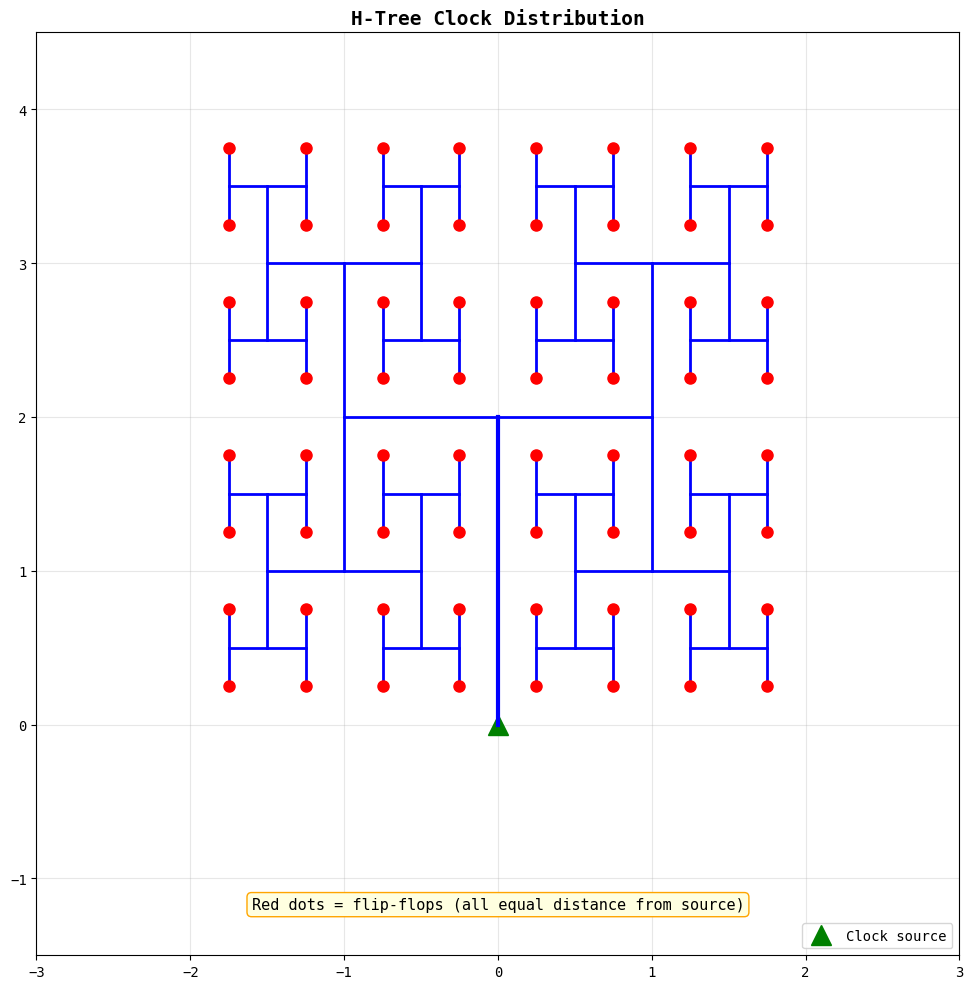

The H-tree ensures all flip-flops receive the clock signal
after traveling the same wire length from the source.


In [8]:
# H-tree clock distribution
fig, ax = plt.subplots(figsize=(10, 10))

def draw_h_tree(ax, x, y, size, depth):
    if depth == 0:
        ax.plot(x, y, 'ro', markersize=8)  # Flip-flop
        return
    
    # Horizontal line
    ax.plot([x - size/2, x + size/2], [y, y], 'b-', linewidth=2)
    
    # Vertical lines at ends
    ax.plot([x - size/2, x - size/2], [y - size/2, y + size/2], 'b-', linewidth=2)
    ax.plot([x + size/2, x + size/2], [y - size/2, y + size/2], 'b-', linewidth=2)
    
    # Recurse
    draw_h_tree(ax, x - size/2, y + size/2, size/2, depth - 1)
    draw_h_tree(ax, x - size/2, y - size/2, size/2, depth - 1)
    draw_h_tree(ax, x + size/2, y + size/2, size/2, depth - 1)
    draw_h_tree(ax, x + size/2, y - size/2, size/2, depth - 1)

# Draw from center
ax.plot(0, 0, 'g^', markersize=15, label='Clock source')
ax.plot([0, 0], [0, 2], 'b-', linewidth=3)
draw_h_tree(ax, 0, 2, 2, 3)

ax.set_xlim(-3, 3)
ax.set_ylim(-1.5, 4.5)
ax.set_aspect('equal')
ax.set_title('H-Tree Clock Distribution', fontsize=14, fontweight='bold')
ax.legend(loc='lower right', fontsize=10)
ax.grid(True, alpha=0.3)

# Add explanation
ax.text(0, -1.2, 'Red dots = flip-flops (all equal distance from source)', 
        ha='center', fontsize=11,
        bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='orange'))

plt.tight_layout()
plt.show()

print("The H-tree ensures all flip-flops receive the clock signal")
print("after traveling the same wire length from the source.")

---
<a id="9-schmitt-trigger"></a>
# 9. Schmitt Trigger
---

### The Problem: Noisy Inputs

Real-world signals aren't perfect. A button press or sensor might produce:

```
Voltage  │
         │    ╱╲  ╱╲
   HIGH ─│───╱──╲╱──╲───────
         │  ╱
   LOW  ─│─╱────────────────
         └──────────────────→ Time
              "Bouncing"
```

A regular gate might see this as multiple transitions!

### The Solution: Hysteresis

A **Schmitt trigger** has two different thresholds:

| Transition | Threshold | Must cross... |
|------------|-----------|---------------|
| LOW → HIGH | V_H (upper) | Higher voltage to turn ON |
| HIGH → LOW | V_L (lower) | Lower voltage to turn OFF |

This gap between thresholds is called **hysteresis**.

### Why It Works

Once the output switches, small noise won't cause it to switch back — the input must cross the *other* threshold.

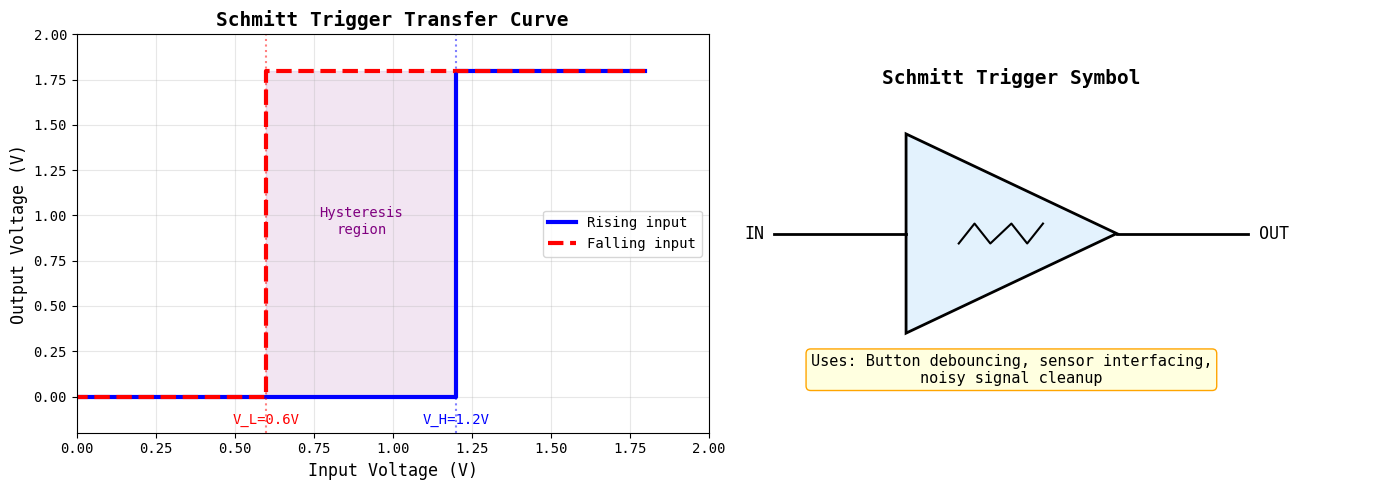

In [9]:
# Schmitt trigger visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left: Transfer characteristic with hysteresis
ax1.set_xlim(0, 2)
ax1.set_ylim(-0.2, 2)

# Thresholds
VL = 0.6  # Lower threshold
VH = 1.2  # Upper threshold

# Draw hysteresis curve
# Rising input (output starts LOW)
vin_rise = [0, VH, VH, 1.8]
vout_rise = [0, 0, 1.8, 1.8]
ax1.plot(vin_rise, vout_rise, 'b-', linewidth=3, label='Rising input')

# Falling input (output starts HIGH)
vin_fall = [1.8, VL, VL, 0]
vout_fall = [1.8, 1.8, 0, 0]
ax1.plot(vin_fall, vout_fall, 'r--', linewidth=3, label='Falling input')

# Mark thresholds
ax1.axvline(x=VL, color='red', linestyle=':', alpha=0.5)
ax1.axvline(x=VH, color='blue', linestyle=':', alpha=0.5)
ax1.text(VL, -0.15, f'V_L={VL}V', ha='center', fontsize=10, color='red')
ax1.text(VH, -0.15, f'V_H={VH}V', ha='center', fontsize=10, color='blue')

# Hysteresis region
ax1.fill_between([VL, VH], [0, 0], [1.8, 1.8], alpha=0.1, color='purple')
ax1.text((VL + VH) / 2, 0.9, 'Hysteresis\nregion', ha='center', fontsize=10, color='purple')

ax1.set_xlabel('Input Voltage (V)', fontsize=12)
ax1.set_ylabel('Output Voltage (V)', fontsize=12)
ax1.set_title('Schmitt Trigger Transfer Curve', fontsize=14, fontweight='bold')
ax1.legend(loc='center right', fontsize=10)
ax1.grid(True, alpha=0.3)

# Right: Schmitt trigger symbol and use case
ax2.set_xlim(0, 12)
ax2.set_ylim(0, 8)

# Schmitt trigger symbol (buffer with hysteresis symbol inside)
triangle = Polygon([(3, 2), (3, 6), (7, 4)], facecolor='#E3F2FD', edgecolor='black', linewidth=2)
ax2.add_patch(triangle)

# Hysteresis symbol inside (small squiggle)
hyst_x = [4, 4.3, 4.6, 5, 5.3, 5.6]
hyst_y = [3.8, 4.2, 3.8, 4.2, 3.8, 4.2]
ax2.plot(hyst_x, hyst_y, 'k-', linewidth=1.5)

# Input
ax2.plot([0.5, 3], [4, 4], 'k-', linewidth=2)
ax2.text(0.3, 4, 'IN', ha='right', va='center', fontsize=12)

# Output
ax2.plot([7, 9.5], [4, 4], 'k-', linewidth=2)
ax2.text(9.7, 4, 'OUT', ha='left', va='center', fontsize=12)

# Labels
ax2.text(5, 7, 'Schmitt Trigger Symbol', ha='center', fontsize=14, fontweight='bold')

# Use cases
ax2.text(5, 1, 'Uses: Button debouncing, sensor interfacing,\nnoisy signal cleanup', 
         ha='center', fontsize=11, 
         bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='orange'))

ax2.axis('off')

plt.tight_layout()
plt.show()

---
<a id="10-additional-resources"></a>
# 10. Additional Resources
---

### Online Tools for Learning

| Tool | What It's For | Link |
|------|---------------|------|
| **TinkerCAD Circuits** | Breadboard simulation, beginner-friendly | [tinkercad.com](https://www.tinkercad.com) |
| **Falstad Circuit Simulator** | Interactive circuit simulation in browser | [falstad.com/circuit](https://www.falstad.com/circuit/) |
| **LTspice** | Free professional SPICE simulator with schematic capture | [analog.com/ltspice](https://www.analog.com/en/resources/design-tools-and-calculators/ltspice-simulator.html) |

### Video Tutorials

| Video | Description |
|-------|-------------|
| [TinkerCAD Breadboarding Tutorial](https://youtu.be/y5I76fLlupI) | Learn to simulate circuits without a physical breadboard |
| [In-Depth Circuits Introduction](https://youtu.be/eLSoJn__gAc) | A more comprehensive circuits overview |

### Recommended Reading

- **"Practical Electronics for Inventors"** by Paul Scherz — Hands-on guide to building circuits ([PDF](http://instrumentacion.qi.fcen.uba.ar/libro/Scherz.pdf))

---
<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 100%); color: white; padding: 30px; margin: 20px -10px -10px -10px; border-radius: 15px 15px 0 0; text-align: center;">

## Summary

- **Electrons** flow through conductors like water through pipes
- **Passive components** (R, L, C) modify current flow without amplification
- **Transistors** (NMOS, PMOS) are voltage-controlled switches
- **CMOS logic** uses complementary transistor pairs to build gates
- **SPICE** simulates circuits from text netlists
- **Clock distribution** (H-tree) ensures synchronized operation
- **Schmitt triggers** clean up noisy signals with hysteresis

### Homework

1. **Modify the AND gate netlist** to create an OR gate instead
   - Hint: Swap the series/parallel arrangement of transistors
   
2. **Schmitt trigger analysis**: Look up a CMOS Schmitt trigger schematic and identify which transistors set the upper vs lower threshold

3. **Optional**: Build a simple circuit (LED + resistor + button) in TinkerCAD and observe current flow

</div>